In [1]:
%%html
<style type='text/css'>
.CodeMirror{
    font-family: Inconsolata;
    font-size: 13px;
}

div.output_area pre {
    font-family: Inconsolata;
    font-size: 11px;
}

div.text_cell_render {
    font-family: Inconsolata;
    font-size: 13px;
}
</style>

In [2]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [5]:
dir_path_results = os.path.join("..", "results")
os.listdir(dir_path_results)

['#1', '#2', '#3', '#4', '#5']

# Different `gnn_type`

## Drugs

In [4]:
metrics4drugs = ['rocauc', 'prauc', 'accuracy', 'jaccard', 'precision', 'recall', 'f1', 'ddi_pred', 'ddi_true']
metrics4items = ['rocauc', 'prauc', 'accuracy', 'jaccard', 'precision', 'recall', 'f1']

In [6]:
dict_df4drugs_gat = {k:[] for k in metrics4drugs}
for timestep in range(20):
    for metric in metrics4drugs:
        curr_ = []
        for i in os.listdir(dir_path_results):
            dir_path_results_dfs = os.path.join(dir_path_results, i, "dfs")
            curr_df = pd.read_csv(os.path.join(dir_path_results_dfs, "4DRUGS_gnn_type=GATConv_batch_size_by_HADMID=128.csv"))
            curr_.append(curr_df[metric].iloc[timestep])
        dict_df4drugs_gat[metric].append(curr_)

df4drugs_gat = pd.DataFrame(data=dict_df4drugs_gat)
df4drugs_gat

,rocauc,prauc,accuracy,jaccard,precision,recall,f1,ddi_pred,ddi_true
0,"[0.9282083668248138, 0.9290396445165662, 0.923...","[0.8854464049479117, 0.8864478836616065, 0.861...","[0.8894024954927049, 0.891165701668692, 0.8925...","[0.7317420871139879, 0.7348336784256052, 0.737...","[0.7925882647525249, 0.7964011576695609, 0.800...","[0.9050489647120492, 0.9048106936071862, 0.903...","[0.8450936112934265, 0.8471517328306434, 0.848...","[0.4174601803868605, 0.4161018799214231, 0.412...","[0.4217065422073024, 0.4217065422073024, 0.421..."
1,"[0.9531781424342264, 0.9537576310179384, 0.949...","[0.9105468785774034, 0.9109287242865708, 0.897...","[0.8979914861003507, 0.8987495730554237, 0.899...","[0.7569616735803744, 0.7585329995629198, 0.759...","[0.7862208295538881, 0.7872002639120843, 0.790...","[0.9531402294254367, 0.9541898882863068, 0.951...","[0.861671241852216, 0.8626883882775606, 0.8633...","[0.4100383352302509, 0.4042405880084078, 0.405...","[0.422452675051387, 0.422452675051387, 0.42245..."
2,"[0.9617566725397896, 0.9621836603906652, 0.959...","[0.9209269422207856, 0.9223495113156668, 0.915...","[0.9080598240259856, 0.9100497938641108, 0.907...","[0.7765754434661924, 0.7803825874765785, 0.775...","[0.8034596486504678, 0.8074027320679861, 0.803...","[0.9586925095036676, 0.9588799057664508, 0.957...","[0.8742386328959414, 0.876645944490675, 0.8737...","[0.4051529820965359, 0.4071002453704795, 0.402...","[0.4209002011799934, 0.4209002011799934, 0.420..."
3,"[0.9684408873480852, 0.9691439626822972, 0.967...","[0.933301380714944, 0.9329857190336336, 0.9283...","[0.9200524502896508, 0.919964380773446, 0.9192...","[0.8004006645167595, 0.8001954317820935, 0.798...","[0.8266969467575069, 0.8266081207257678, 0.825...","[0.9617778299671208, 0.9616016909347112, 0.961...","[0.8891361576247727, 0.8890095126949017, 0.888...","[0.4017232731767581, 0.3994755040046969, 0.402...","[0.41799233999243, 0.41799233999243, 0.4179923..."
4,"[0.9732399838345992, 0.9741230672265138, 0.973...","[0.9396860309691788, 0.942224571165978, 0.9396...","[0.9291432186014048, 0.9285870086812372, 0.928...","[0.8194876639253167, 0.8183432280974311, 0.819...","[0.8445723448730064, 0.8432818753573471, 0.844...","[0.9650242114906424, 0.9651223661824369, 0.964...","[0.9007894696657353, 0.9000976443305261, 0.900...","[0.3994737375496086, 0.3972296789533986, 0.398...","[0.4194398788428902, 0.4194398788428902, 0.419..."
5,"[0.9771827424977192, 0.9780539519198954, 0.979...","[0.9476090419667238, 0.9494985233836802, 0.953...","[0.9396953077391834, 0.939244363193175, 0.9421...","[0.8417956260391355, 0.8409330227512045, 0.846...","[0.8702320354333312, 0.8685364004877566, 0.877...","[0.9626325411334552, 0.963583180987203, 0.9604...","[0.9141031872786612, 0.9135943702008908, 0.917...","[0.3902664005074004, 0.3910084837043788, 0.392...","[0.4163181904260679, 0.4163181904260679, 0.416..."
6,"[0.9812091165683752, 0.981385637713429, 0.9816...","[0.9563282332297632, 0.9571772142905574, 0.956...","[0.9474307529398652, 0.9464693752438276, 0.946...","[0.8584824275158471, 0.8566952629615815, 0.856...","[0.8931902439024391, 0.8883731724297981, 0.889...","[0.9566962046480522, 0.960040127069052, 0.9587...","[0.9238531554622698, 0.9228173088512998, 0.922...","[0.3864772919060927, 0.3894543600364668, 0.387...","[0.4170261815329862, 0.4170261815329862, 0.417..."
7,"[0.9846021767727976, 0.9843740855215594, 0.985...","[0.9634552628669916, 0.9628519862895746, 0.965...","[0.9551002824182664, 0.955898074130806, 0.9555...","[0.8771608171817705, 0.8793855821260255, 0.878...","[0.908778436072543, 0.9086891824863598, 0.9090...","[0.961849600306352, 0.9646259154659902, 0.9629...","[0.9345611832007814, 0.9358224203585028, 0.935...","[0.3809437760676229, 0.3792087253668564, 0.379...","[0.403962583471336, 0.403962583471336, 0.40396..."
8,"[0.9873552399394366, 0.9878744655042824, 0.988...","[0.9691562585431768, 0.9697960599065044, 0.970...","[0.9621568412993547, 0.9613183127346968, 0.961...","[0.894864782

In [7]:
df4drugs_gat.rocauc.values

array([list([0.9282083668248138, 0.9290396445165662, 0.923546975223832, 0.925970237608466, 0.9270131481735876]),
       list([0.9531781424342264, 0.9537576310179384, 0.9499700149309622, 0.9521935954625008, 0.9511800720160444]),
       list([0.9617566725397896, 0.9621836603906652, 0.9598685690830514, 0.9613980081989946, 0.9623290367621676]),
       list([0.9684408873480852, 0.9691439626822972, 0.9671142598969894, 0.9676084793025468, 0.9673658936420152]),
       list([0.9732399838345992, 0.9741230672265138, 0.9731649290871212, 0.9733481001699738, 0.9736660958617868]),
       list([0.9771827424977192, 0.9780539519198954, 0.9791984830001772, 0.9779906931275464, 0.9771398463949948]),
       list([0.9812091165683752, 0.981385637713429, 0.9816738918560618, 0.9808394740844756, 0.9800472156946812]),
       list([0.9846021767727976, 0.9843740855215594, 0.9851599846346484, 0.9845456911261206, 0.9842506899687744]),
       list([0.9873552399394366, 0.9878744655042824, 0.9880272006757292, 0.98722081

In [8]:
def get_means(list_scores):
    return [np.array(scores).mean() for scores in list_scores]

get_means(df4drugs_gat.rocauc.values)

[0.9267556744694531,
 0.9520558911723345,
 0.9615071893949338,
 0.9679346965743868,
 0.9735084352359988,
 0.9779131433880668,
 0.9810310671834046,
 0.9845865256047801,
 0.9875291649150053,
 0.9896243368115464,
 0.9913253674079398,
 0.9925543680110334,
 0.9931671120654328,
 0.993978652865958,
 0.9948065056336748,
 0.9951568200189967,
 0.9948289450671716,
 0.9966410164096124,
 0.997164014301464,
 0.9974281896893743]

In [9]:
def get_stds(list_scores):
    return [np.array(scores).std() for scores in list_scores]

get_stds(df4drugs_gat.rocauc.values)

[0.0019134152123990512,
 0.0013632510962629204,
 0.0008823021027655298,
 0.0007512156075399767,
 0.00035168148069400886,
 0.0007495882367411984,
 0.0005613050991123181,
 0.00031262886495503215,
 0.0003529780063586534,
 0.0002598802893420445,
 0.00026255898590030825,
 0.0002176200129908608,
 0.00037570864236306193,
 0.00044487046778064233,
 0.00021513481778842087,
 0.0003445858395230526,
 0.00045161810769704777,
 0.0002553088855655063,
 0.00013646639140784138,
 0.00027821638910491156]

In [10]:
dict_df4drugs_gen = {k:[] for k in metrics4drugs}
for timestep in range(20):
    for metric in metrics4drugs:
        curr_ = []
        for i in os.listdir(dir_path_results):
            dir_path_results_dfs = os.path.join(dir_path_results, i, "dfs")
            curr_df = pd.read_csv(os.path.join(dir_path_results_dfs, "4DRUGS_gnn_type=GENConv_batch_size_by_HADMID=128.csv"))
            curr_.append(curr_df[metric].iloc[timestep])
        dict_df4drugs_gen[metric].append(curr_)

df4drugs_gen = pd.DataFrame(data=dict_df4drugs_gen)

In [36]:
get_means(df4drugs_gen.ddi_true.values)

[0.4217065422073024,
 0.42245267505138695,
 0.4209002011799933,
 0.41799233999243,
 0.41943987884289025,
 0.4163181904260679,
 0.4170261815329862,
 0.40396258347133596,
 0.3987819576843546,
 0.3937641902087916,
 0.3896966298557148,
 0.3834728816198907,
 0.3766328558215125,
 0.3755024480926154,
 0.3711522541631185,
 0.3641399176292786,
 0.3493743922186322,
 0.35291180789863,
 0.3509326762836018,
 0.3477567540595015]

In [35]:
get_stds(df4drugs_gen.ddi_pred.values)

[0.0014514384992353599,
 0.0018371432177020659,
 0.001970974082986091,
 0.00181199594935708,
 0.0019481724623206128,
 0.0023694016700487133,
 0.0032097616215945456,
 0.0033371761631441053,
 0.0025751415601385197,
 0.0023752249710339577,
 0.0025047013925925668,
 0.0022591470901880675,
 0.0024329103615063226,
 0.0016669952692996742,
 0.0031626945851639513,
 0.0028141816174481137,
 0.00446831213328245,
 0.003064135146898901,
 0.004456617495838079,
 0.003649154764472781]

In [11]:
dict_df4drugs_gine = {k:[] for k in metrics4drugs}
for timestep in range(20):
    for metric in metrics4drugs:
        curr_ = []
        for i in os.listdir(dir_path_results):
            dir_path_results_dfs = os.path.join(dir_path_results, i, "dfs")
            curr_df = pd.read_csv(os.path.join(dir_path_results_dfs, "4DRUGS_gnn_type=GINEConv_batch_size_by_HADMID=128.csv"))
            curr_.append(curr_df[metric].iloc[timestep])
        dict_df4drugs_gine[metric].append(curr_)

df4drugs_gine = pd.DataFrame(data=dict_df4drugs_gine)

## Items

In [12]:
dict_df4items_gat = {k:[] for k in metrics4items}
for timestep in range(20):
    for metric in metrics4items:
        curr_ = []
        for i in os.listdir(dir_path_results):
            dir_path_results_dfs = os.path.join(dir_path_results, i, "dfs")
            curr_df = pd.read_csv(os.path.join(dir_path_results_dfs, "4ITEMS_gnn_type=GATConv_batch_size_by_HADMID=128.csv"))
            curr_.append(curr_df[metric].iloc[timestep])
        dict_df4items_gat[metric].append(curr_)

df4items_gat = pd.DataFrame(data=dict_df4items_gat)

In [13]:
dict_df4items_gen = {k:[] for k in metrics4items}
for timestep in range(20):
    for metric in metrics4items:
        curr_ = []
        for i in os.listdir(dir_path_results):
            dir_path_results_dfs = os.path.join(dir_path_results, i, "dfs")
            curr_df = pd.read_csv(os.path.join(dir_path_results_dfs, "4ITEMS_gnn_type=GENConv_batch_size_by_HADMID=128.csv"))
            curr_.append(curr_df[metric].iloc[timestep])
        dict_df4items_gen[metric].append(curr_)

df4items_gen = pd.DataFrame(data=dict_df4items_gen)

In [14]:
dict_df4items_gine = {k:[] for k in metrics4items}
for timestep in range(20):
    for metric in metrics4items:
        curr_ = []
        for i in os.listdir(dir_path_results):
            dir_path_results_dfs = os.path.join(dir_path_results, i, "dfs")
            curr_df = pd.read_csv(os.path.join(dir_path_results_dfs, "4ITEMS_gnn_type=GINEConv_batch_size_by_HADMID=128.csv"))
            curr_.append(curr_df[metric].iloc[timestep])
        dict_df4items_gine[metric].append(curr_)

df4items_gine = pd.DataFrame(data=dict_df4items_gine)

## Visualization

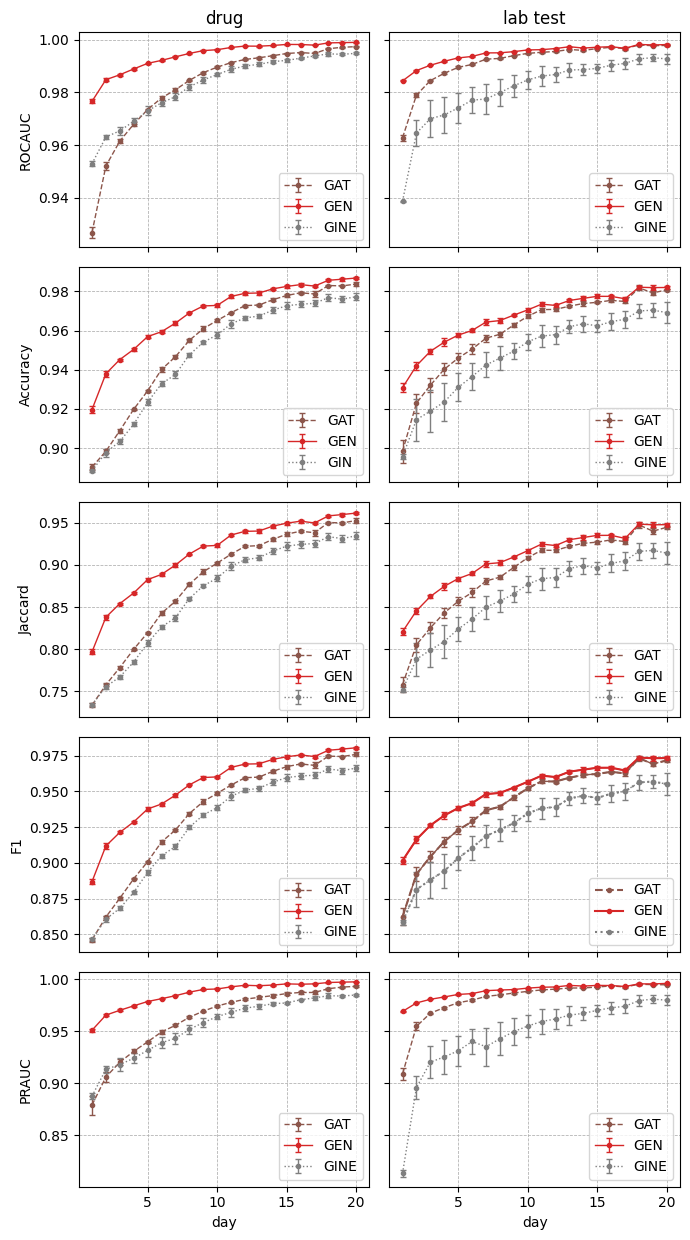

In [16]:
fmts = ('.C7:', '.C5--', '.C2:', '.C3-')
timesteps = range(1, 20+1)

fig, axs = plt.subplots(5, 2, sharex="all", sharey="row", figsize=(3.5*2, 2.5*5))

# AUC
axs[0, 0].set_title('drug')
axs[0, 0].errorbar(timesteps, get_means(df4drugs_gat.rocauc.values),  get_stds(df4drugs_gat.rocauc.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[0, 0].errorbar(timesteps, get_means(df4drugs_gen.rocauc.values),  get_stds(df4drugs_gen.rocauc.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[0, 0].errorbar(timesteps, get_means(df4drugs_gine.rocauc.values), get_stds(df4drugs_gine.rocauc.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[0, 0].set_ylabel('ROCAUC')
axs[0, 0].legend(["GAT", "GEN", "GINE"])
axs[0, 0].grid(True, linestyle='--', linewidth=.57)
axs[0, 1].set_title('lab test')
axs[0, 1].errorbar(timesteps, get_means(df4items_gat.rocauc.values),  get_stds(df4items_gat.rocauc.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[0, 1].errorbar(timesteps, get_means(df4items_gen.rocauc.values),  get_stds(df4items_gen.rocauc.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[0, 1].errorbar(timesteps, get_means(df4items_gine.rocauc.values), get_stds(df4items_gine.rocauc.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[0, 1].legend(["GAT", "GEN", "GINE"])
axs[0, 1].grid(True, linestyle='--', linewidth=.57)

# ACC
axs[1, 0].errorbar(timesteps, get_means(df4drugs_gat.accuracy.values),  get_stds(df4drugs_gat.accuracy.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[1, 0].errorbar(timesteps, get_means(df4drugs_gen.accuracy.values),  get_stds(df4drugs_gen.accuracy.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[1, 0].errorbar(timesteps, get_means(df4drugs_gine.accuracy.values), get_stds(df4drugs_gine.accuracy.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend(["GAT", "GEN", "GIN"])
axs[1, 0].grid(True, linestyle='--', linewidth=.57)
axs[1, 1].errorbar(timesteps, get_means(df4items_gat.accuracy.values),  get_stds(df4items_gat.accuracy.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[1, 1].errorbar(timesteps, get_means(df4items_gen.accuracy.values),  get_stds(df4items_gen.accuracy.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[1, 1].errorbar(timesteps, get_means(df4items_gine.accuracy.values), get_stds(df4items_gine.accuracy.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[1, 1].legend(["GAT", "GEN", "GINE"])
axs[1, 1].grid(True, linestyle='--', linewidth=.57)

# JACCARD
axs[2, 0].errorbar(timesteps, get_means(df4drugs_gat.jaccard.values),  get_stds(df4drugs_gat.jaccard.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[2, 0].errorbar(timesteps, get_means(df4drugs_gen.jaccard.values),  get_stds(df4drugs_gen.jaccard.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[2, 0].errorbar(timesteps, get_means(df4drugs_gine.jaccard.values), get_stds(df4drugs_gine.jaccard.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[2, 0].set_ylabel('Jaccard')
axs[2, 0].legend(["GAT", "GEN", "GINE"])
axs[2, 0].grid(True, linestyle='--', linewidth=.57)
axs[2, 1].errorbar(timesteps, get_means(df4items_gat.jaccard.values),  get_stds(df4items_gat.jaccard.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[2, 1].errorbar(timesteps, get_means(df4items_gen.jaccard.values),  get_stds(df4items_gen.jaccard.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[2, 1].errorbar(timesteps, get_means(df4items_gine.jaccard.values), get_stds(df4items_gine.jaccard.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[2, 1].legend(["GAT", "GEN", "GINE"])
axs[2, 1].grid(True, linestyle='--', linewidth=.57)

# F1
axs[3, 0].errorbar(timesteps, get_means(df4drugs_gat.f1.values),  get_stds(df4drugs_gat.f1.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[3, 0].errorbar(timesteps, get_means(df4drugs_gen.f1.values),  get_stds(df4drugs_gen.f1.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[3, 0].errorbar(timesteps, get_means(df4drugs_gine.f1.values), get_stds(df4drugs_gine.f1.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[3, 0].set_ylabel('F1')
axs[3, 0].legend(["GAT", "GEN", "GINE"])
axs[3, 0].grid(True, linestyle='--', linewidth=.57)
axs[3, 1].plot(timesteps, get_means(df4items_gat.f1.values), fmts[1],
               timesteps, get_means(df4items_gen.f1.values), fmts[3],
               timesteps, get_means(df4items_gine.f1.values), fmts[0])
axs[3, 1].errorbar(timesteps, get_means(df4items_gat.f1.values),  get_stds(df4items_gat.f1.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[3, 1].errorbar(timesteps, get_means(df4items_gen.f1.values),  get_stds(df4items_gen.f1.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[3, 1].errorbar(timesteps, get_means(df4items_gine.f1.values), get_stds(df4items_gine.f1.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[3, 1].legend(["GAT", "GEN", "GINE"])
axs[3, 1].grid(True, linestyle='--', linewidth=.57)

# PRAUC
axs[4, 0].errorbar(timesteps, get_means(df4drugs_gat.prauc.values),  get_stds(df4drugs_gat.prauc.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[4, 0].errorbar(timesteps, get_means(df4drugs_gen.prauc.values),  get_stds(df4drugs_gen.prauc.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[4, 0].errorbar(timesteps, get_means(df4drugs_gine.prauc.values), get_stds(df4drugs_gine.prauc.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[4, 0].set_ylabel('PRAUC')
axs[4, 0].legend(["GAT", "GEN", "GINE"])
axs[4, 0].grid(True, linestyle='--', linewidth=.57)
axs[4, 0].set_xlabel('day')
axs[4, 1].errorbar(timesteps, get_means(df4items_gat.prauc.values),  get_stds(df4items_gat.prauc.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[4, 1].errorbar(timesteps, get_means(df4items_gen.prauc.values),  get_stds(df4items_gen.prauc.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[4, 1].errorbar(timesteps, get_means(df4items_gine.prauc.values), get_stds(df4items_gine.prauc.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[4, 1].legend(["GAT", "GEN", "GINE"])
axs[4, 1].grid(True, linestyle='--', linewidth=.57)
axs[4, 1].set_xlabel('day')

# fig.suptitle('Performance of different downstream recommendation tasks \n')
plt.tight_layout()

# Total performance

## Drugs

In [18]:
dict_gat = {
    'rocauc': [],
    'prauc': [],
    'accuracy': [],
    'jaccard': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'ddi_pred': [],
    'ddi_true': []
}
for i in os.listdir(dir_path_results):
    dir_path_results_drugs = os.path.join(dir_path_results, f"{i}", "total_dicts")
    with open(os.path.join(dir_path_results_drugs, "4DRUGS_gnn_type=GATConv_batch_size_by_HADMID=128.pickle"), 'rb') as f:
        current_pickle = pickle.load(f)
        for k in [key for key in dict_gat.keys()]:
            dict_gat[k].append(current_pickle[k])

for k, v in dict_gat.items():
    arr = np.array(v)
    print(f"{k:>9}: mean={arr.mean():.4f}, std={arr.std():.4f}")

   rocauc: mean=0.9785, std=0.0003
    prauc: mean=0.9547, std=0.0007
 accuracy: mean=0.9371, std=0.0004
  jaccard: mean=0.8357, std=0.0008
precision: mean=0.8665, std=0.0011
   recall: mean=0.9593, std=0.0007
       f1: mean=0.9105, std=0.0005
 ddi_pred: mean=0.3873, std=0.0010
 ddi_true: mean=0.4051, std=0.0000


In [19]:
dict_gen = {
    'rocauc': [],
    'prauc': [],
    'accuracy': [],
    'jaccard': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'ddi_pred': [],
    'ddi_true': []
}
for i in os.listdir(dir_path_results):
    dir_path_results_drugs = os.path.join(dir_path_results, f"{i}", "total_dicts")
    with open(os.path.join(dir_path_results_drugs, "4DRUGS_gnn_type=GENConv_batch_size_by_HADMID=128.pickle"), 'rb') as f:
        current_pickle = pickle.load(f)
        for k in [key for key in dict_gen.keys()]:
            dict_gen[k].append(current_pickle[k])

for k, v in dict_gen.items():
    arr = np.array(v)
    print(f"{k:>9}: mean={arr.mean():.4f}, std={arr.std():.4f}")

print(dict_gen['ddi_true'])

   rocauc: mean=0.9923, std=0.0002
    prauc: mean=0.9830, std=0.0004
 accuracy: mean=0.9583, std=0.0006
  jaccard: mean=0.8859, std=0.0015
precision: mean=0.9091, std=0.0020
   recall: mean=0.9719, std=0.0011
       f1: mean=0.9395, std=0.0008
 ddi_pred: mean=0.3836, std=0.0007
 ddi_true: mean=0.4051, std=0.0000
[0.4051409874381537, 0.4051409874381537, 0.4051409874381537, 0.4051409874381537, 0.4051409874381537]


In [20]:
dict_gine = {
    'rocauc': [],
    'prauc': [],
    'accuracy': [],
    'jaccard': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'ddi_pred': [],
    'ddi_true': []
}
for i in os.listdir(dir_path_results):
    dir_path_results_drugs = os.path.join(dir_path_results, f"{i}", "total_dicts")
    with open(os.path.join(dir_path_results_drugs, "4DRUGS_gnn_type=GINEConv_batch_size_by_HADMID=128.pickle"), 'rb') as f:
        current_pickle = pickle.load(f)
        for k in [key for key in dict_gine.keys()]:
            dict_gine[k].append(current_pickle[k])

for k, v in dict_gine.items():
    arr = np.array(v)
    print(f"{k:>9}: mean={arr.mean():.4f}, std={arr.std():.4f}")

   rocauc: mean=0.9786, std=0.0009
    prauc: mean=0.9473, std=0.0030
 accuracy: mean=0.9319, std=0.0008
  jaccard: mean=0.8244, std=0.0017
precision: mean=0.8544, std=0.0024
   recall: mean=0.9592, std=0.0015
       f1: mean=0.9038, std=0.0010
 ddi_pred: mean=0.3661, std=0.0045
 ddi_true: mean=0.4051, std=0.0000


## Items

In [21]:
dict_gat = {
    'rocauc': [],
    'prauc': [],
    'accuracy': [],
    'jaccard': [],
    'precision': [],
    'recall': [],
    'f1': []
}
for i in os.listdir(dir_path_results):
    dir_path_results_drugs = os.path.join(dir_path_results, f"{i}", "total_dicts")
    with open(os.path.join(dir_path_results_drugs, "4ITEMS_gnn_type=GATConv_batch_size_by_HADMID=128.pickle"), 'rb') as f:
        current_pickle = pickle.load(f)
        for k in [key for key in dict_gat.keys()]:
            dict_gat[k].append(current_pickle[k])

for k, v in dict_gat.items():
    arr = np.array(v)
    print(f"{k:>9}: mean={arr.mean():.4f}, std={arr.std():.4f}")

   rocauc: mean=0.9881, std=0.0001
    prauc: mean=0.9755, std=0.0003
 accuracy: mean=0.9437, std=0.0025
  jaccard: mean=0.8513, std=0.0050
precision: mean=0.8771, std=0.0102
   recall: mean=0.9668, std=0.0059
       f1: mean=0.9197, std=0.0029


In [22]:
dict_gen = {
    'rocauc': [],
    'prauc': [],
    'accuracy': [],
    'jaccard': [],
    'precision': [],
    'recall': [],
    'f1': []
}
for i in os.listdir(dir_path_results):
    dir_path_results_drugs = os.path.join(dir_path_results, f"{i}", "total_dicts")
    with open(os.path.join(dir_path_results_drugs, "4ITEMS_gnn_type=GENConv_batch_size_by_HADMID=128.pickle"), 'rb') as f:
        current_pickle = pickle.load(f)
        for k in [key for key in dict_gen.keys()]:
            dict_gen[k].append(current_pickle[k])

for k, v in dict_gen.items():
    arr = np.array(v)
    print(f"{k:>9}: mean={arr.mean():.4f}, std={arr.std():.4f}")

   rocauc: mean=0.9928, std=0.0001
    prauc: mean=0.9855, std=0.0001
 accuracy: mean=0.9568, std=0.0012
  jaccard: mean=0.8816, std=0.0024
precision: mean=0.9113, std=0.0058
   recall: mean=0.9644, std=0.0037
       f1: mean=0.9371, std=0.0014


In [23]:
dict_gine = {
    'rocauc': [],
    'prauc': [],
    'accuracy': [],
    'jaccard': [],
    'precision': [],
    'recall': [],
    'f1': []
}
for i in os.listdir(dir_path_results):
    dir_path_results_drugs = os.path.join(dir_path_results, f"{i}", "total_dicts")
    with open(os.path.join(dir_path_results_drugs, "4ITEMS_gnn_type=GINEConv_batch_size_by_HADMID=128.pickle"), 'rb') as f:
        current_pickle = pickle.load(f)
        for k in [key for key in dict_gine.keys()]:
            dict_gine[k].append(current_pickle[k])

for k, v in dict_gine.items():
    arr = np.array(v)
    print(f"{k:>9}: mean={arr.mean():.4f}, std={arr.std():.4f}")

   rocauc: mean=0.9755, std=0.0042
    prauc: mean=0.9367, std=0.0112
 accuracy: mean=0.9325, std=0.0060
  jaccard: mean=0.8269, std=0.0122
precision: mean=0.8522, std=0.0155
   recall: mean=0.9655, std=0.0041
       f1: mean=0.9052, std=0.0073
